# Math 104A
## Karen Kurpershoek
### Date: November 6, 2017
### Perm: 7766587

#### 1(a)


$
P_2 = \frac{(x - x_1)(x-x_2)}{(x_0 - x_1)(x_0 - x_2)}f_0 + \frac{(x - x_0)(x-x_2)}{(x_1- x_0)(x_1 - x_2)}f_1 + \frac{(x - x_0)(x-x_1)}{(x_2 - x_0)(x_2 - x_1)}f_2
$
$
= \frac{(x - 1)(x - 3)}{(0 - 1)(0 - 3)}(1) + \frac{(x-0)(x-3)}{(1-0)(1-3)}(1) + \frac{(x-0)(x-1)}{(3-0)(3-1)}(-5)
$
$
= -x^2 + x + 1
$


#### 1(b)

$f(2) \approx $ $p_2(2) = -1$

#### 2(a)

In [14]:
import numpy as np
import math

#Define Lebesgue function
#Precondition: Takes in an array of nodes, a value to estimate the Lebesgue function at, and the number of nodes
#Postcondition: Returns the value approximated by the Lebesgue function
def Lebesgue(x, est_pt, n):
    summation = 0
    for j in range(len(x)):
        prod = 1
        for k in range (len(x)):
            if k != j:
                prod *= abs(((est_pt - x[k])/(x[j] - x[k]))) # calculate |l_j(x)|
        summation += prod
    return summation

#### 2(b)

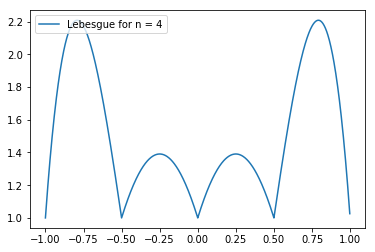

In [94]:
import matplotlib.pyplot as plt

#Construct nodes
#Precondition: Takes in number of nodes
#Postcondition: Returns an array of equispaced nodes
def Nodes(n):
    nodes = []
    for i in range (n+1):
        h = -1 + i*(2.0/n)
        nodes.append(h)
    return nodes

#Construct barx_k 
#Gives an array of 1000 equispaced points to plot our function
def barx_k():
    est_pts = []
    for i in range (1000):
        pt = -1 + i*(2.0/1000.0)
        est_pts.append(pt)
    return est_pts

#points on x axis
x = [] 
x = barx_k()

#initialize array for points on y axis for n = 4
n4plotting_points = []

#initialize array for points on y axis for n = 10
n10plotting_points = []

#initialize array for points on y axis for n = 20
n20plotting_points = []

#1000 approximation points determined using Lebesgue function
for i in range (1000):
    n4plotting_points.append(Lebesgue(Nodes(4), x[i], 1001))
for i in range(1000):
    n10plotting_points.append(Lebesgue(Nodes(10), x[i], 1001))
for i in range(1000):
    n20plotting_points.append(Lebesgue(Nodes(20), x[i], 1001))
    
fig, ax = plt.subplots()

#plot for n = 4
ax.plot(x, n4plotting_points, label = "Lebesgue for n = 4")

#Legend
legend=ax.legend(loc = "upper left")

plt.show()


Since $\Lambda_n$ = $||L_n(x)||_\infty$, we see by the graph that $\Lambda_n$ is about 2.2

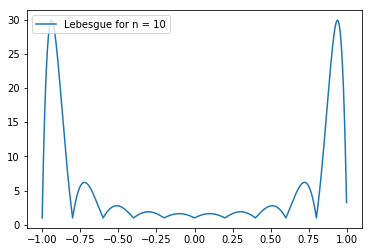

In [16]:
fig, ax = plt.subplots()

#plot for n = 10
ax.plot(x, n10plotting_points, label = "Lebesgue for n = 10")

#Legend
legend=ax.legend(loc = "upper left")

plt.show()

Since $\Lambda_n$ = $||L_n(x)||_\infty$, we see by the graph that $\Lambda_n$ is about 30

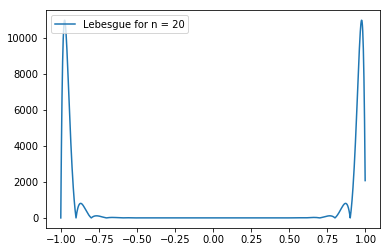

In [17]:
fig, ax = plt.subplots()

#plot for n = 20
ax.plot(x, n20plotting_points, label = "Lebesgue for n = 20")

#Legend
legend=ax.legend(loc = "upper left")

plt.show()

Since $\Lambda_n$ = $||L_n(x)||_\infty$, we see by the graph that $\Lambda_n$ is over 1000

#### 2(c)

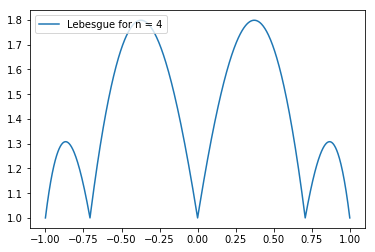

In [95]:
#Construct nodes
#Precondition: Takes in number of nodes
#Postcondition: Returns an array of chebyshev nodes
def Cheby_Nodes(n):
    nodes = []
    for i in range (n+1):
        h = np.cos((math.pi*i)/n)
        nodes.append(h)
    return nodes

#Construct barx_k 
#Gives an array of 1000 points, using chebyshev formula
def barx_k():
    est_pts = []
    for i in range (1000):
        pt = np.cos((math.pi*i)/1000)
        est_pts.append(pt)
    return est_pts

#points on x axis
x = [] 
x = barx_k()

#initialize array for points on y axis for n = 4
n4plotting_points = []

#initialize array for points on y axis for n = 10
n10plotting_points = []

#initialize array for points on y axis for n = 20

n20plotting_points = []


for i in range (1000):
    n4plotting_points.append(Lebesgue(Cheby_Nodes(4), x[i], 1000))
for i in range(1000):
    n10plotting_points.append(Lebesgue(Cheby_Nodes(10), x[i], 1000))
for i in range(1000):
    n20plotting_points.append(Lebesgue(Cheby_Nodes(20), x[i], 1000))
    
fig, ax = plt.subplots()

#plot for n = 4
ax.plot(x, n4plotting_points, label = "Lebesgue for n = 4")

#Legend
legend=ax.legend(loc = "upper left")

plt.show()


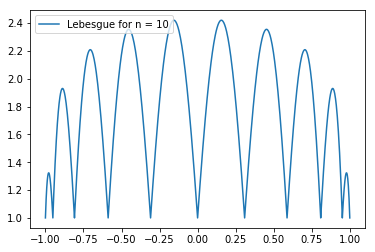

In [19]:
fig, ax = plt.subplots()

#plot for n = 10
ax.plot(x, n10plotting_points, label = "Lebesgue for n = 10")

#Legend
legend=ax.legend(loc = "upper left")

plt.show()

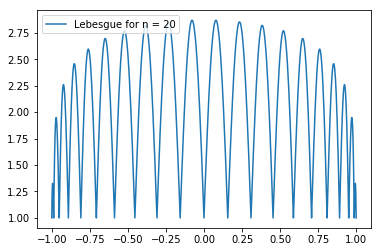

In [20]:
fig, ax = plt.subplots()

#plot for n = 20
ax.plot(x, n20plotting_points, label = "Lebesgue for n = 20")

#Legend
legend=ax.legend(loc = "upper left")

plt.show()

For the chebyshev nodes, $\Lambda_n$ does not vary as much as it does for the equidistributed points. For the chebyshev nodes $\Lambda_n$ is about 1.8 when $n = 4$, about 2.4 when $n = 10$ and  about 2.75 when $n = 20$. Further, we see that for the equidistributed points, the error becomes very large towards the end points whereas for the Chebyshev polynomials, we have a slightly larger errors towards the center but still more uniform spacing overall. 

#### 3(a)

In [96]:
#Compute Barycentric Weights
#Precondition: Takes in number of nodes and an array of ndoes
#Postcondition: Returns the barycentric weights for general nodes
def bary_weights(n, x):
    
    #initialize n by n array
    y = [[0 for i in range(n)] for k in range(n)]
    y[0][0] = 1
    
    #initialize y[m][m]
    for m in range (1, n):
        prod = 1
        for k in range (0, m):
            prod *= (x[m] - x[k])
        y[m][m] = 1/prod
        
    #use recursion to define y[j][m]    
    for m in range (1, n):
        for j in range(m):
            y[j][m] = y[j][(m-1)]/(x[j] - x[m])
            
    #to find weights, sum all that comes before it? (ask TA)
    Y =[0 for i in range(n)]
    for i in range(n):
        for j in range(n):
            Y[i] += y[i-1][n-1]
    
    return Y

#Compute Barycentric Formula
#Precondition: x is an array of nodes, f is a function, n is the number of nodes,
#est_pt is the estimation point and weights are the weights you are using for the barycentric formula
def bary_formula(x, f, n, est_pt, weights):
    summation1 = 0
    summation2 = 0
    
    for j in range(n+1):
        if (est_pt != x[j]):
            summation1 += (f[j]*((weights[j])/(est_pt - x[j])))
            summation2 += ((weights[j])/(est_pt - x[j]))
        else:
            return f[j]
    return (summation1/summation2)            

#### 3(b)

In [27]:
x = [0.0, 0.25, 0.52, 0.74, 1.28, 1.5]
f = [0.0, 0.7070, 1.0, 0.7071, -0.7074, -1.000]

#Using Barycentric formula to approximate f(2)
weights = bary_weights(6, x)
print (bary_formula(x, f, 6, 2, weights))

-4.33061708704


#### 4(a)

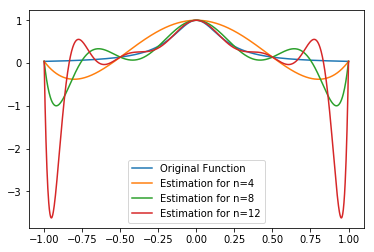

In [92]:
#Define function given to us
def func(x):
    return (1.0/(1.0 + 25.0*(x**2)))

#Equisdistant points from -1, 1, step size is 1000
h = np.linspace(-1, 1, 1000)

#Define barycentric weights for equidistributed nodes
def equi_weights(n):
    y = []
    for j in range(n):
        y.append(((-1)**j)*((math.factorial(n-1))/((math.factorial(n-1-j))*(math.factorial(j)))))
    return y

#n=4
x4 = Nodes(4)

f4 = []
for i in range(5):
    f4.append(func(x4[i]))


weights4 = equi_weights(5)
plt_pts4 = []

for i in range(1000):
    plt_pts4.append(bary_formula(x4, f4, 4, h[i], weights4))

#n=8
x8 = Nodes(8)

f8 = []
for i in range(9):
    f8.append(func(x8[i]))
    
weights8 = equi_weights(9)
plt_pts8 = []

for i in range(1000):
    plt_pts8.append(bary_formula(x8, f8, 8, h[i], weights8))

#n=12
x12 = Nodes(12)

f12 = []
for i in range(13):
    f12.append(func(x12[i]))
    
weights12 = equi_weights(13)
plt_pts12 = []

for i in range(1000):
    plt_pts12.append(bary_formula(x12, f12, 12, h[i], weights12))

#Plot interpolating polynomials for equidistributed nodes
Runge = []
for i in range(1000):
    Runge.append(func(h[i]))
    
fig, ax = plt.subplots()
ax.plot(h, Runge, label = "Original Function")
ax.plot(h, plt_pts4, label = "Estimation for n=4")
ax.plot(h, plt_pts8, label = "Estimation for n=8")
ax.plot(h, plt_pts12, label = "Estimation for n=12")
legend = ax.legend(loc = "lower center")
plt.show()

#### 4(b)

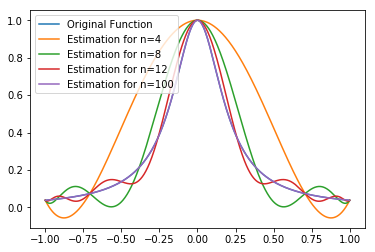

In [84]:
#Define barycentric weights for Chebyshev nodes
def cheby_weights(n):
    y = []
    y.append(.5)
    for j in range (1, n):
        y.append((-1)**j)
    y.append(.5*(-1)**n)
    return y

#estimation points
def barx_k():
    est_pts = []
    for i in range (1000):
        pt = np.cos((math.pi*i)/1000)
        est_pts.append(pt)
    return est_pts

h= []
h = barx_k()

#n=4
x4 = Cheby_Nodes(4)


f4 = []
for i in range(5):
    f4.append(func(x4[i]))
    
weights4 = cheby_weights(4)


plot_pts4 = []

for i in range(1000):
    plot_pts4.append(bary_formula(x4, f4, 4, h[i], weights4))

#n=8
x8 = Cheby_Nodes(8)

f8 = []
for i in range(9):
    f8.append(func(x8[i]))
weights8 = cheby_weights(8)
plot_pts8 = []

for i in range(1000):
    plot_pts8.append(bary_formula(x8, f8, 8, h[i], weights8))
    
#n=12
x12 = Cheby_Nodes(12)

f12 = []
for i in range(13):
    f12.append(func(x12[i]))
weights12 = cheby_weights(12)
plot_pts12 = []

for i in range(1000):
    plot_pts12.append(bary_formula(x12, f12, 12, h[i], weights12))
    
#n=100

x100 = Cheby_Nodes(100)

f100 = []
for i in range(101):
    f100.append(func(x100[i]))
weights100 = cheby_weights(100)
plot_pts100 = []

for i in range(1000):
    plot_pts100.append(bary_formula(x100, f100, 100, h[i], weights100))
    
#Plot interpolating polynomials
Runge = []
for i in range(1000):
    Runge.append(func(h[i]))
fig, a = plt.subplots()

a.plot(h, Runge, label = "Original Function")
a.plot(h, plot_pts4, label = "Estimation for n=4")
a.plot(h, plot_pts8, label = "Estimation for n=8")
a.plot(h, plot_pts12, label = "Estimation for n=12")
a.plot(h, plot_pts100, label = "Estimation for n=100")
legend = a.legend(loc = "upper left")
plt.show()


#### 4 c

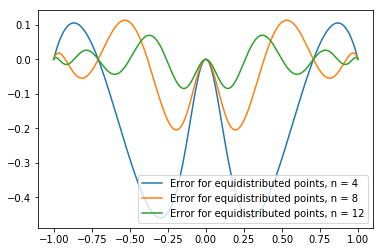

In [90]:
#Error for equidistributed points, n = 4
equi_err4 = []
for i in range(1000):
    equi_err4.append(func(h[i]) - plt_pts4[i])

#Error for equidistributed points,  n = 8
equi_err8 = []
for i in range(1000):
    equi_err8.append(func(h[i]) - plt_pts8[i])
    
#Error for equidistributed points,  n = 12
equi_err12 = []
for i in range(1000):
    equi_err12.append(func(h[i]) - plt_pts12[i])
    
fig, b=plt.subplots()

b.plot(h, equi_err4, label = "Error for equidistributed points, n = 4" )
b.plot(h, equi_err8, label = "Error for equidistributed points, n = 8")
b.plot(h, equi_err12, label = "Error for equidistributed points, n = 12")
legend = b.legend(loc = "lower right")
plt.show()

This error function makes sense because we see that for n = 4, the error function hits the x = 0 line 5 times, which is the same amount of times $p_4(x)$ = $f(x)$. Likewise, we see a similar pattern for n = 8 and n = 12. In addition, we see that the largest error for each of the error functions happens towards the center. This can be attributed to the steepness of the slope of $f(x)$.

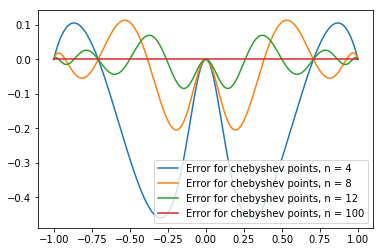

In [88]:
#Error for chebyshev points, n = 4
cheby_err4 = []
for i in range(1000):
    cheby_err4.append(func(h[i]) - plot_pts4[i])

#Error for chebyshev points,  n = 8
cheby_err8 = []
for i in range(1000):
    cheby_err8.append(func(h[i]) - plot_pts8[i])
    
#Error for chebyshev points,  n = 12
cheby_err12 = []
for i in range(1000):
    cheby_err12.append(func(h[i]) - plot_pts12[i])
    
#Error for chebyshev points,  n = 100
cheby_err100 = []
for i in range(1000):
    cheby_err100.append(func(h[i]) - plot_pts100[i])  
    
fig, b=plt.subplots()

b.plot(h, cheby_err4, label = "Error for chebyshev points, n = 4" )
b.plot(h, cheby_err8, label = "Error for chebyshev points, n = 8")
b.plot(h, cheby_err12, label = "Error for chebyshev points, n = 12")
b.plot(h, cheby_err100, label = "Error for chebyshev points, n = 100")
legend = b.legend(loc = "lower right")
plt.show()

For this error function, we see that each error function crosses $x = 0$ the expected number of times. i.e. the error function for n = 4 crosses $x = 0$ 5 times. Also, we notice that when n = 100, the error function is essentially 0 because n = 100 nearly estimates $f(x)$ exactly as evidenced in 4 (b).

#### 4(d)

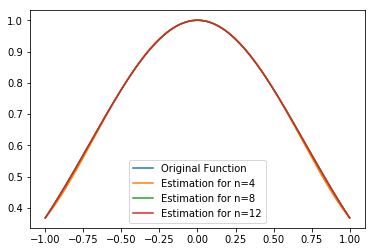

In [93]:
#Define function given to us
def func(x):
    return (math.exp(-x**2))

#Equisdistant points from -1, 1, step size is 1000
h = np.linspace(-1, 1, 1000)

#Define barycentric weights for equidistributed nodes
def equi_weights(n):
    y = []
    for j in range(n):
        y.append(((-1)**j)*((math.factorial(n-1))/((math.factorial(n-1-j))*(math.factorial(j)))))
    return y

#n=4
x4 = Nodes(4)

f4 = []
for i in range(5):
    f4.append(func(x4[i]))


weights4 = equi_weights(5)
plt_pts4 = []

for i in range(1000):
    plt_pts4.append(bary_formula(x4, f4, 4, h[i], weights4))

#n=8
x8 = Nodes(8)

f8 = []
for i in range(9):
    f8.append(func(x8[i]))
    
weights8 = equi_weights(9)
plt_pts8 = []

for i in range(1000):
    plt_pts8.append(bary_formula(x8, f8, 8, h[i], weights8))

#n=12
x12 = Nodes(12)

f12 = []
for i in range(13):
    f12.append(func(x12[i]))
    
weights12 = equi_weights(13)
plt_pts12 = []

for i in range(1000):
    plt_pts12.append(bary_formula(x12, f12, 12, h[i], weights12))

#Plot interpolating polynomials for equidistributed nodes
Runge = []
for i in range(1000):
    Runge.append(func(h[i]))
    
fig, ax = plt.subplots()
ax.plot(h, Runge, label = "Original Function")
ax.plot(h, plt_pts4, label = "Estimation for n=4")
ax.plot(h, plt_pts8, label = "Estimation for n=8")
ax.plot(h, plt_pts12, label = "Estimation for n=12")
legend = ax.legend(loc = "lower center")
plt.show()

Our estimations for $e^{-x^2}$ are much better than they were for $\frac{1}{1+25x^2}$ because $e^{-x^2}$ is a smoother function and so our approximations are more accurate.